In [5]:
'''
Goto Runtime and select change runtime and set to GPU, if not done so then the entire training process in CPU will be
very very slow

To bring kaggle dataset to google colab goto

         Your kaggle profile

         settings

         and select create new API token

         and upload that file (kaggle.json) here.

Then copy API command and paste in next cell below this one.
'''
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:09<00:00, 116MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [7]:
#exact path to test dataset = /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/dogs_vs_cats

path_train = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/dogs_vs_cats/train'
path_test = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/dogs_vs_cats/test'

In [8]:
#https://www.kaggle.com/datasets/salader/dogs-vs-cats

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [9]:
'''
If we import all training images and apply our ML algorithm then we will be short on RAM space soo instead of doing
that we will use generatore. Generators divides total datas in number of batches and then applies the ML algorithm.
Generators are very useful for training large number of images. keras provide us with a generator and we will use one
here.

https://keras.io/api/data_loading/image/

'''

train_ds = keras.utils.image_dataset_from_directory( #this is training dataset
    directory=path_train,
    labels='inferred',
    label_mode='int',#<--- Assign 0 to cat 1 to dog
    batch_size=32,
    image_size=(256,256) #<--- Reshape our image because they are of different sizes
)

test_ds = keras.utils.image_dataset_from_directory( #this is testing dataset
    directory=path_test,
    labels='inferred',
    label_mode='int',#<--- Assign 0 to cat 1 to dog
    batch_size=32,
    image_size=(256,256) #<--- Reshape our image because they are of different sizes
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
#here images are stored in numpy array in numbers between 0-255 so we should normalize 0-1

def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [13]:
'''
making CNN layer

Our CNN architecture will have 32 filters in first layer, 2nd layer will have 64 filters, 3rd layer will be 128
filters

                        - { 1  } -
                        - { 2  } -
                        - { 3  } -
                        - { 4  } -
            - { 1} -    - { 5  } -
            - { 2} -    - { 6  } -
            - { 3} -    - { 7  } -
- { 1} -    - { 4} -    - { 8  } -
- { 2} -    - { 5} -    - { 9  } -
- { 3} -    - { 6} -    - { 10 } -
......      ........    ...........      - { 1} -
- {31} -    - {62} -    - { 126} -
- {32} -    - {63} -    - { 127} -
            - {64} -    - { 128} -
'''

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))#1st layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))#2nd layer

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))#3rd layer

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 0.5618 - loss: 0.7033 - val_accuracy: 0.6724 - val_loss: 0.6192
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.7169 - loss: 0.5589 - val_accuracy: 0.7778 - val_loss: 0.4786
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.7909 - loss: 0.4420 - val_accuracy: 0.7694 - val_loss: 0.4983
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8581 - loss: 0.3135 - val_accuracy: 0.7870 - val_loss: 0.5486
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9322 - loss: 0.1680 - val_accuracy: 0.7782 - val_loss: 0.8372
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 71ms/step - accuracy: 0.9652 - loss: 0.0921 - val_accuracy: 0.7668 - val_loss: 1.0395
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - accuracy: 0.9798 - loss: 0.0626 - val_accuracy: 0.7690 - val_loss: 1.0962
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9837 - loss: 0.0501 - 

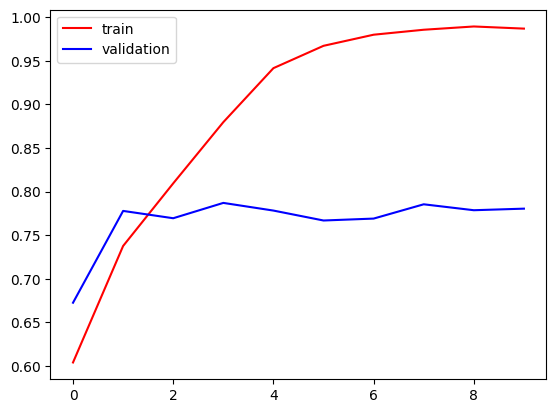

In [17]:
'''
Here we can see that our model have exceptionally high accuracy 99% meaning that model has overfitting problem.
Inorder to get further insights we will plot model analysis graphs.
'''

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

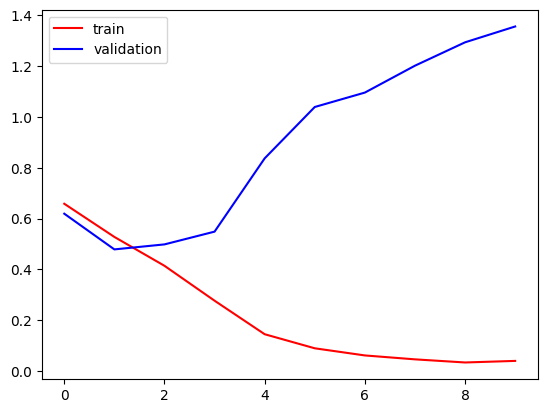

In [18]:
'''
We can see that as we train our model training accuracy has improved however validation is between 0.75 to 0.8 and then thir is
the gap between blue and red line which shows overfitting. Now plotting validation loss and training loss for futher insights
'''

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
'''
we can see that training loss is decreasing while validation loss is increasing. Which indicates overfitting. This graps
says that model is performing great on training data and not so gretat in test data.

Now, we should solve overfitting problem on our model. Ways to solve overfitting are

1. Add more data
2. Data Agumentation
3. L1/L2 Regularization
4. Dropout
5. Batch Normalization
6. Reduce Complexity

Here we will do 'Dropout' and 'Batch Normlization
'''

from keras.layers import BatchNormalization, Dropout

#now we will change our model


In [20]:
#recreating our CNN model
#Batch Normalization (it improves the training as well)

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())   #<---- Extra line of code than before
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))#1st layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())   #<---- Extra line of code than before
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))#2nd layer

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())   #<---- Extra line of code than before
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))#3rd layer

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1)) #<---- Extra line of code than before
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1)) #<---- Extra line of code than before
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5483 - loss: 2.3111 - val_accuracy: 0.6614 - val_loss: 0.6183
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6479 - loss: 0.6242 - val_accuracy: 0.5950 - val_loss: 0.6656
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7135 - loss: 0.5408 - val_accuracy: 0.7448 - val_loss: 0.5244
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7689 - loss: 0.4629 - val_accuracy: 0.7670 - val_loss: 0.4878
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.7903 - loss: 0.4272 - val_accuracy: 0.7826 - val_loss: 0.4840
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8165 - loss: 0.3695 - val_accuracy: 0.7788 - val_loss: 0.4752
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8362 - loss: 0.3377 - val_accuracy: 0.8060 - val_loss: 0.4759
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8655 - loss: 0.2826 - 

New Graph


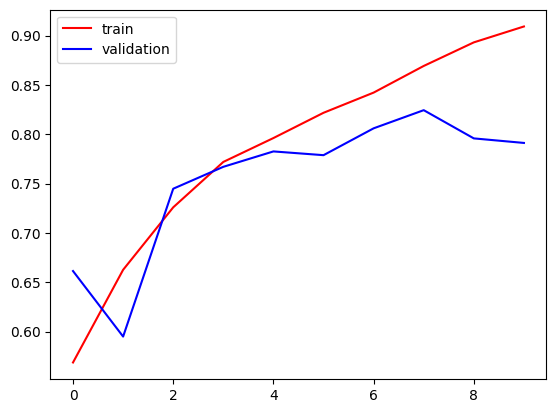

In [24]:
'''
Here we can see that our model have exceptionally high accuracy 96% meaning that model has overfitting problem.
Inorder to get further insights we will plot model analysis graphs.
'''

print("New Graph")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

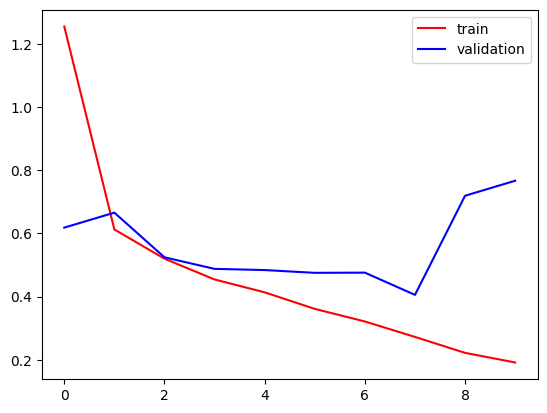

In [25]:
'''
We can see that as we train our model training accuracy has improved however validation is between ??? to ??? and then thir is
the gap between blue and red line which shows overfitting. Now plotting validation loss and training loss for futher insights
'''

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

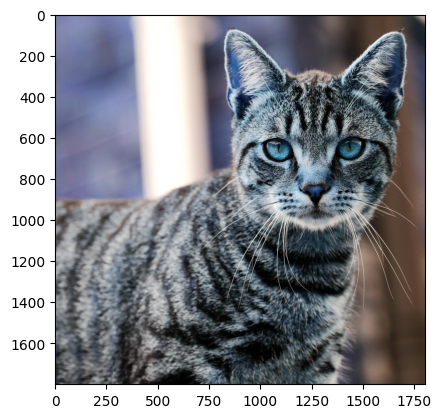

In [49]:
'''Now we will test the model with completely unseen model of dog and cat'''

import cv2

test_img = cv2.imread('/content/image_1.jpg')
plt.imshow(test_img)

In [50]:
test_img.shape

(1800, 1800, 3)

In [51]:
test_img = cv2.resize(test_img,(256,256))#changing image shape so that it is suitable for our model
test_input = test_img.reshape((1,256,256,3))

In [52]:
model.predict(test_input) #array([[1.]],dtype=float32); (1-0.58) = .42; 42% its a cat. Hence, model classified image correctly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.5857129]], dtype=float32)

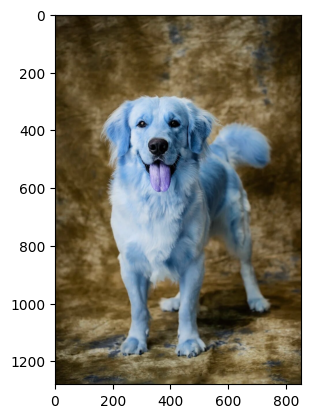

In [53]:
#Doing same for dog image

test_img = cv2.imread('/content/image_2.jpg')
plt.imshow(test_img)

In [54]:
test_img.shape

(1280, 853, 3)

In [55]:
test_img = cv2.resize(test_img,(256,256))#changing image shape so that it is suitable for our model
test_input = test_img.reshape((1,256,256,3))

In [56]:
model.predict(test_input) #array([[0.]],dtype=float32); 99% its a dog. Hence, model classified image correctly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.99817514]], dtype=float32)